# Task
## Predict whether a customer will buy a car insurance policy based on their demographic and historical data.
## Optimize for business impact and explain key decision factors.

In [2]:
import os
import kagglehub

c:\Users\jackd\Documents\Lebenslauf_2025\HUK_coburg_preparation\hukenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:



# Download latest version
path = kagglehub.dataset_download("anmolkumar/health-insurance-cross-sell-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jackd\.cache\kagglehub\datasets\anmolkumar\health-insurance-cross-sell-prediction\versions\1


In [4]:
# List files in the dataset
print("Files in the dataset:")
for file in os.listdir(path):
    print(file)

Files in the dataset:
sample_submission.csv
test.csv
train.csv


# Load and explore Data

In [5]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(os.path.join(path,"train.csv"))

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Check the target distribution

In [26]:
data_imbalance = df["Response"].value_counts()

In [27]:
data_imbalance.head()

Response
0    334399
1     46710
Name: count, dtype: int64

In [32]:
type(data_imbalance)

pandas.core.series.Series

In [28]:
(data_imbalance[1]/(data_imbalance[1] + data_imbalance[0]) ) * 100

np.float64(12.256336113815209)

In [29]:
(data_imbalance[1]/(data_imbalance[0]) ) * 100

np.float64(13.968343206767964)

12 % mildly imbalanced

<Axes: xlabel='Response'>

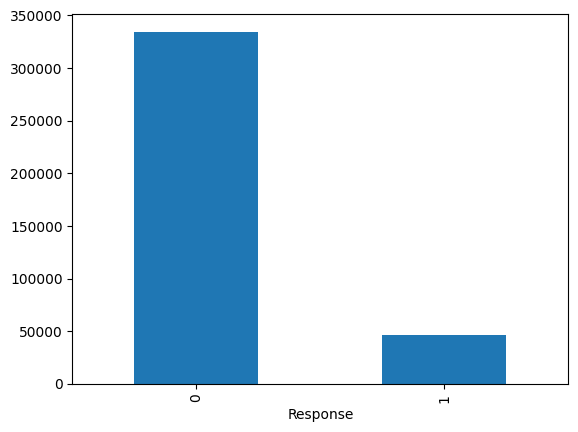

In [30]:
df["Response"].value_counts().plot(kind="bar")

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset , WeightedRandomSampler
import pandas as pd
import numpy as np

# Load the data already done



In [35]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df["Annual_Premium"].plot(kind="bar")

# 

# Separate features and target

In [ ]:
# Seperate features & target
X = df.drop("Response", axis=1)
y = df["Response"]
# Define preprocessing
# Splitting the numeric features and categorical features
numeric_features = ["Age", "Annual_Premium", "Vintage"]

In [38]:
# Converting the data in to numpy array
X = df.drop("Response", axis=1).values
type(X)
X[0]

array([1, 'Male', 44, 1, 28.0, 0, '> 2 Years', 'Yes', 40454.0, 26.0, 217],
      dtype=object)

In [15]:
df.get("Age").describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# 